
# EUR/USD Exchange Rate Visualization


## Import dataset

In [2]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [4]:
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

In [5]:
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [7]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [8]:
# Make a copy to work with
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

In [9]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.3086     6
          ..
0.9555     1
1.5071     1
1.4694     1
1.3330     1
1.1418     1
Name: US_dollar, Length: 3528, dtype: int64

There is a non-numeric character '-'

In [10]:
# Select the rows that don't have the character
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
# convert object column to float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [11]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# add the 30-day rolling average column
euro_to_dollar['rolling_mean'] = euro_to_dollar.US_dollar.rolling(30).mean()

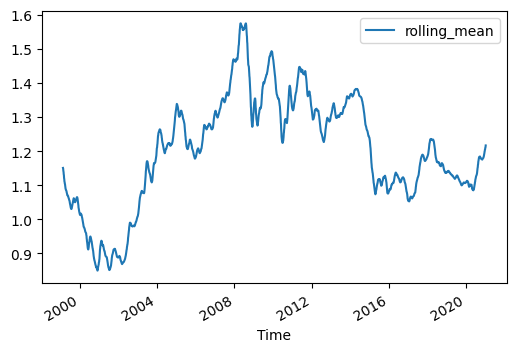

In [14]:
euro_to_dollar.plot.line(x='Time', y='rolling_mean')
plt.show()

In [15]:
# segment the data by Presicdency
bush_term = (euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2009)
bush = euro_to_dollar[bush_term]

obama_term = (euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2017)
obama = euro_to_dollar[obama_term]

trump_term = (euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year < 2021)
trump = euro_to_dollar[trump_term]

In [17]:
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

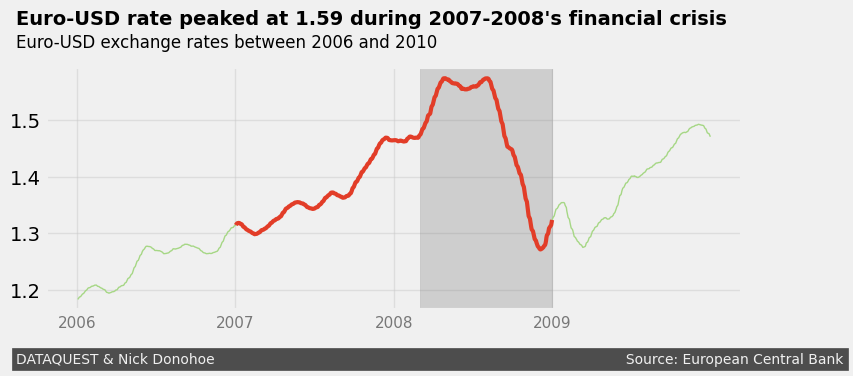

In [22]:
import matplotlib.style as style
style.use('fivethirtyeight')
#%matplotlib inline

### Adding the plot
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], 
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=pd.to_datetime('2008-03-01'), 
           xmax=pd.to_datetime('2009-01-01'), 
           alpha=0.3, color='grey')
    
### Adding separate tick labels
font = {
        'size': 11,
        'alpha': 0.5
        }
ax.set_xticks(ticks=[pd.to_datetime('2006'), pd.to_datetime('2007'), 
                     pd.to_datetime('2008'), pd.to_datetime('2009')])
ax.set_xticklabels(['2006', '2007', '2008', '2009'], fontdict=font)

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, 'DATAQUEST & Nick Donohoe' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()